In [31]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
for i in train_samples:
    print(i, end=' ')

61 96 16 66 59 83 45 67 37 76 31 83 39 91 25 69 51 92 48 90 64 68 30 81 34 77 49 95 44 75 49 93 48 65 39 87 26 70 57 98 22 98 14 68 41 89 45 66 52 100 60 99 24 74 21 76 56 91 52 65 20 82 56 89 25 91 20 82 19 69 32 81 49 86 44 79 55 72 57 88 44 82 31 91 57 80 58 92 17 73 61 84 53 79 41 65 39 79 46 69 50 66 51 76 34 98 13 86 56 83 49 74 40 87 41 88 60 89 55 97 25 75 42 94 50 96 48 95 59 76 17 72 28 81 61 87 27 66 54 72 23 82 31 84 20 86 30 100 42 86 13 71 14 98 58 82 29 95 42 98 22 75 31 80 55 89 45 74 58 70 40 100 40 95 64 73 55 84 35 76 54 76 48 66 18 65 13 93 63 93 22 99 26 100 15 86 30 96 45 68 15 99 64 84 34 65 46 90 36 82 34 89 32 92 29 67 35 92 42 65 59 65 35 77 59 75 55 93 31 91 27 68 38 71 30 68 59 75 19 80 43 78 16 96 44 70 37 89 20 75 51 73 54 65 43 79 48 89 35 99 29 76 44 78 20 90 63 96 30 89 53 65 40 82 64 82 54 89 27 80 33 80 35 70 32 72 60 70 14 71 23 69 17 72 30 77 30 89 18 83 23 71 53 89 57 67 35 89 49 87 24 69 48 89 41 78 43 97 31 65 34 73 45 71 27 71 53 78 22 85 22 70 

In [6]:
for i in train_labels:
    print(i,end=' ')

1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
for i in scaled_train_samples:
    print(i,end=' ')

[0.77011494] [0.59770115] [0.62068966] [0.22988506] [0.74712644] [0.96551724] [0.8045977] [0.79310345] [0.18390805] [0.83908046] [0.04597701] [0.81609195] [0.91954023] [0.27586207] [0.83908046] [0.50574713] [0.64367816] [0.31034483] [0.5862069] [0.66666667] [0.65517241] [0.1954023] [0.5862069] [0.26436782] [0.81609195] [0.25287356] [0.26436782] [0.56321839] [0.42528736] [0.34482759] [0.52873563] [0.72413793] [0.36781609] [0.68965517] [0.75862069] [0.89655172] [0.47126437] [0.59770115] [0.11494253] [0.95402299] [0.13793103] [0.90804598] [0.32183908] [0.18390805] [0.28735632] [0.33333333] [0.59770115] [0.40229885] [0.96551724] [0.56321839] [0.42528736] [0.36781609] [0.98850575] [0.09195402] [0.55172414] [0.8045977] [0.52873563] [0.73563218] [0.63218391] [0.89655172] [0.25287356] [0.56321839] [0.55172414] [0.97701149] [0.54022989] [0.44827586] [0.27586207] [0.65517241] [0.50574713] [0.7816092] [0.20689655] [0.14942529] [0.96551724] [0.90804598] [0.94252874] [0.79310345] [0.72413793] [0.82

 [0.05747126] [0.57471264] [0.72413793] [0.52873563] [0.72413793] [0.86206897] [0.02298851] [0.50574713] [0.6091954] [0.4137931] [0.70114943] [0.68965517] [0.11494253] [0.8045977] [0.10344828] [0.95402299] [0.55172414] [0.64367816] [0.4137931] [0.50574713] [0.72413793] [0.66666667] [0.33333333] [0.89655172] [0.59770115] [0.63218391] [0.91954023] [0.] [0.06896552] [0.32183908] [0.85057471] [0.93103448] [0.88505747] [0.72413793] [0.63218391] [0.88505747] [0.66666667] [0.7816092] [0.5862069] [0.59770115] [0.95402299] [0.73563218] [0.77011494] [0.02298851] [0.85057471] [0.44827586] [0.62068966] [0.01149425] [0.54022989] [0.96551724] [0.95402299] [0.70114943] [0.83908046] [0.11494253] [0.91954023] [0.13793103] [0.12643678] [0.67816092] [0.87356322] [0.05747126] [0.7816092] [0.66666667] [0.34482759] [0.74712644] [0.2183908] [0.71264368] [0.1954023] [0.87356322] [0.57471264] [0.36781609] [0.74712644] [0.66666667] [0.12643678] [0.14942529] [0.11494253] [0.74712644] [0.37931034] [0.32183908] [0

In [10]:
print(scaled_train_samples.shape)

(2100, 1)


In [11]:
model = Sequential([
            Dense(units=16, input_shape=(1,), activation='relu'),
            Dense(units=32, activation='relu'),
            Dense(units=2, activation='softmax')])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

In [15]:
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6306 - accuracy: 0.5423 - val_loss: 0.6136 - val_accuracy: 0.6190
Epoch 2/30
189/189 - 0s - loss: 0.6050 - accuracy: 0.6439 - val_loss: 0.5852 - val_accuracy: 0.6952
Epoch 3/30
189/189 - 0s - loss: 0.5790 - accuracy: 0.7127 - val_loss: 0.5582 - val_accuracy: 0.7476
Epoch 4/30
189/189 - 0s - loss: 0.5505 - accuracy: 0.7587 - val_loss: 0.5285 - val_accuracy: 0.7667
Epoch 5/30
189/189 - 0s - loss: 0.5228 - accuracy: 0.7947 - val_loss: 0.5006 - val_accuracy: 0.7905
Epoch 6/30
189/189 - 0s - loss: 0.4953 - accuracy: 0.8212 - val_loss: 0.4721 - val_accuracy: 0.8429
Epoch 7/30
189/189 - 0s - loss: 0.4680 - accuracy: 0.8519 - val_loss: 0.4446 - val_accuracy: 0.8810
Epoch 8/30
189/189 - 0s - loss: 0.4419 - accuracy: 0.8646 - val_loss: 0.4181 - val_accuracy: 0.8905
Epoch 9/30
189/189 - 0s - loss: 0.4173 - accuracy: 0.8772 - val_loss: 0.3938 - val_accuracy: 0.9048
Epoch 10/30
189/189 - 0s - loss: 0.3948 - accuracy: 0.8889 - val_loss: 0.3714 - val_accuracy: 0.9333

In [16]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [27]:
predictions = model.predict(
    x=scaled_test_samples,
    batch_size=10,
    verbose=0) 

In [30]:
for i in predictions:
    print(i)

[0.66229516 0.33770487]
[0.950304   0.04969597]
[0.01129672 0.98870325]
[0.38311064 0.61688936]
[0.9483919  0.05160805]
[0.8888431  0.11115684]
[0.9459996  0.05400041]
[0.1826489  0.81735116]
[0.9587831  0.04121692]
[0.9213504  0.07864961]
[0.78791034 0.21208963]
[0.95910496 0.04089506]
[0.4450154 0.5549846]
[0.95874715 0.04125282]
[0.9573815 0.0426185]
[0.5720543  0.42794567]
[0.9586032  0.04139676]
[0.01129672 0.98870325]
[0.04071949 0.95928055]
[0.7657754 0.2342247]
[0.01129672 0.98870325]
[0.22391969 0.7760803 ]
[0.9008537  0.09914637]
[0.9483919  0.05160805]
[0.9564206  0.04357939]
[0.95207685 0.04792322]
[0.02510204 0.974898  ]
[0.35339883 0.6466012 ]
[0.01129672 0.98870325]
[0.0091553  0.99084467]
[0.01254653 0.9874535 ]
[0.13218169 0.86781836]
[0.95521015 0.04478982]
[0.9586032  0.04139676]
[0.9587831  0.04121692]
[0.9589979  0.04100207]
[0.09405433 0.9059456 ]
[0.9588906  0.04110936]
[0.04071949 0.95928055]
[0.04601374 0.9539862 ]
[0.9292406  0.07075945]
[0.9394838 0.0605161]


In [29]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i, end=' ')

0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 

In [32]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [33]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[191  19]
 [  9 201]]


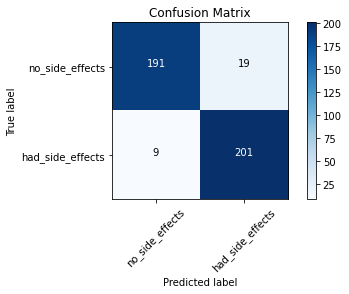

In [35]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [37]:
model.save('models/medical_trial_model.h5')

In [38]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [39]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
new_model.get_weights()

[array([[-0.09505492,  0.4750855 , -0.2763728 ,  0.61163557, -0.4082954 ,
         -0.16695553, -0.47424123, -0.48498714, -0.19388363,  0.21025753,
          0.4494443 ,  0.671065  , -0.08509571, -0.3797781 , -0.17654017,
         -0.04559696]], dtype=float32),
 array([ 0.        , -0.10508639,  0.        , -0.10865893,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.20642227,
        -0.10694619, -0.13839367,  0.25273478,  0.        ,  0.        ,
         0.23418245], dtype=float32),
 array([[ 0.01212177,  0.33220598, -0.07424033,  0.31774196, -0.30096424,
         -0.12062478, -0.11740983, -0.02578914,  0.26475796,  0.24617484,
          0.17921844,  0.05854803, -0.18332522,  0.0289892 , -0.13170628,
         -0.16884744, -0.3461635 ,  0.27735165, -0.02368519,  0.18527499,
          0.30274156, -0.17627388,  0.14902529,  0.29999712, -0.11784023,
         -0.20792633, -0.28938144,  0.33510503, -0.01963073, -0.0822216 ,
         -0.34448776,  0.04057291],
 

In [42]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [43]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [44]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.save_weights('models/my_model_weights.h5')

In [46]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [47]:
model2.load_weights('models/my_model_weights.h5')

In [48]:
model2.get_weights()

[array([[-0.09505492,  0.4750855 , -0.2763728 ,  0.61163557, -0.4082954 ,
         -0.16695553, -0.47424123, -0.48498714, -0.19388363,  0.21025753,
          0.4494443 ,  0.671065  , -0.08509571, -0.3797781 , -0.17654017,
         -0.04559696]], dtype=float32),
 array([ 0.        , -0.10508639,  0.        , -0.10865893,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.20642227,
        -0.10694619, -0.13839367,  0.25273478,  0.        ,  0.        ,
         0.23418245], dtype=float32),
 array([[ 0.01212177,  0.33220598, -0.07424033,  0.31774196, -0.30096424,
         -0.12062478, -0.11740983, -0.02578914,  0.26475796,  0.24617484,
          0.17921844,  0.05854803, -0.18332522,  0.0289892 , -0.13170628,
         -0.16884744, -0.3461635 ,  0.27735165, -0.02368519,  0.18527499,
          0.30274156, -0.17627388,  0.14902529,  0.29999712, -0.11784023,
         -0.20792633, -0.28938144,  0.33510503, -0.01963073, -0.0822216 ,
         -0.34448776,  0.04057291],
 